In [ ]:
! pip install -q nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.3 MB/s eta 0:00:00


# Data Acquisition

First, let's obtain the resting-state fMRI data from the ADHD200 dataset using the fetch_adhd function:

In [ ]:
from nilearn import datasets

# Choose how many subjects to get (e.g., 30 subjects)
n_subjects = 30

# Fetch the ADHD200 resting-state fMRI dataset
adhd_dataset = datasets.fetch_adhd(n_subjects=n_subjects)
func_filenames = adhd_dataset.func

# Dictionary Learning for Low and High Order Components

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:739: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.3. Use 'max_iter' instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/nilearn/decomposition/dict_learning.py:268: UserWarning: Persisting input arguments took 1.69s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  self.loadings_init_ = self._cache(_compute_loadings)(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:739: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.3. Use 'max_iter' instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/nilearn/decomposition/dict_learning.py:297: UserWarning: Persisting input arguments took 1.60s to run

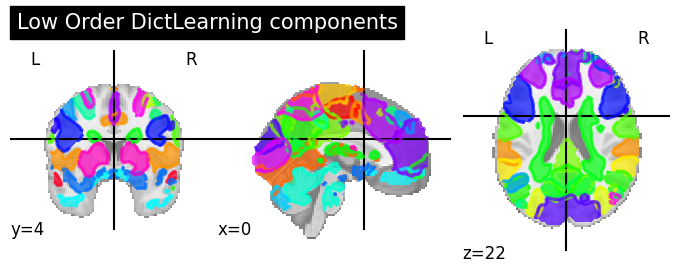

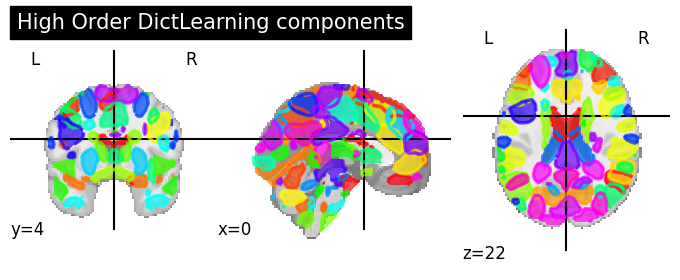

In [ ]:
from nilearn.decomposition import DictLearning
import matplotlib.pyplot as plt
from nilearn.plotting import plot_prob_atlas

# Create a low order DictLearning object with a target of 30 components
low_order_dict_learning = DictLearning(n_components=30, memory="nilearn_cache", memory_level=2, n_jobs=-1, verbose=0)

# Fit the low order DictLearning to the data
low_order_dict_learning.fit(func_filenames)

# Create a high order DictLearning object with a target of 150 components
high_order_dict_learning = DictLearning(n_components=150, memory="nilearn_cache", memory_level=2, n_jobs=-1, verbose=0)

# Fit the high order DictLearning to the data
high_order_dict_learning.fit(func_filenames)

# Visualize low order DictLearning components
plot_prob_atlas(low_order_dict_learning.components_img_, title="Low Order DictLearning components", view_type='filled_contours')
plt.show()

# Visualize high order DictLearning components
plot_prob_atlas(high_order_dict_learning.components_img_, title="High Order DictLearning components", view_type='filled_contours')
plt.show()
